# 050.Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [4]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

dataset 을 Training 과 Test set 으로 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [7]:
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression model 을 fitting

In [8]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [9]:
y_pred = lr_classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  18.0
accuracy = 0.93


In [10]:
y_pred_proba = lr_classifier.predict_proba(X_test)

print(y_pred_proba[:5])
print()
print(y_pred_proba[:,1][:50])

[[0.87397564 0.12602436]
 [0.82308938 0.17691062]
 [0.7922792  0.2077208 ]
 [0.89908522 0.10091478]
 [0.89298557 0.10701443]]

[0.12602436 0.17691062 0.2077208  0.10091478 0.10701443 0.00976727
 0.01804698 0.73434492 0.00762765 0.49898276 0.04202461 0.03461863
 0.17142359 0.37820537 0.01954722 0.35259451 0.29180572 0.01565439
 0.98632223 0.04749635 0.09836247 0.95925398 0.28456724 0.87407643
 0.0057815  0.96935938 0.08898959 0.08702488 0.20483206 0.17101724
 0.0251403  0.30491539 0.92241231 0.1627098  0.01775628 0.00463549
 0.02454727 0.07340366 0.03224642 0.54144972 0.07660121 0.2909855
 0.06819766 0.04474186 0.79863516 0.03140396 0.31159272 0.91993059
 0.01098176 0.84966242]


In [11]:
y_pred_proba_1 = y_pred_proba[:, 1]

THRESHOLD = 0.5
print("Counts of y_predicted as 1 with threshold {} : ".format(THRESHOLD), 
          sum(y_pred_proba_1 > THRESHOLD))

THRESHOLD = 0.6
print("Counts of y_predicted as 1 with threshold {} : ".format(THRESHOLD), 
          sum(y_pred_proba_1 > THRESHOLD))

Counts of y_predicted as 1 with threshold 0.5 :  18
Counts of y_predicted as 1 with threshold 0.6 :  16


## confusion matrix 를 이용한 model 평가

In [12]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [13]:
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred))
print()
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))

confution matrix
 [[17  5]
 [ 1 57]]

f1 score
 0.85

Accuracy: 0.93
Precision: 0.94
Recall: 0.77


## Visualization

roc_curve(y_true, y_score)  

fpr - false positive rates,  tpr - true positive rates

In [14]:
y_probas = lr_classifier.predict_proba(X_test)
y_scores = y_probas[:,1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

Text(0.5, 1.0, 'ROC Curve')

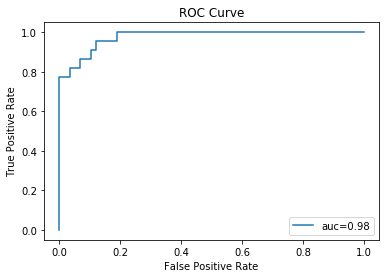

In [15]:
plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [16]:
from matplotlib.colors import ListedColormap

THRESHOLD  = 0.5

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1     

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

XX = np.column_stack([X1.ravel(), X2.ravel()])

In [17]:
lr_classifier.predict_proba(XX)[:, 1] > THRESHOLD

array([False, False, False, ...,  True,  True,  True])

In [19]:
Y = np.array(lr_classifier.predict_proba(XX)[:, 1] > THRESHOLD).reshape(X1.shape)
Y

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

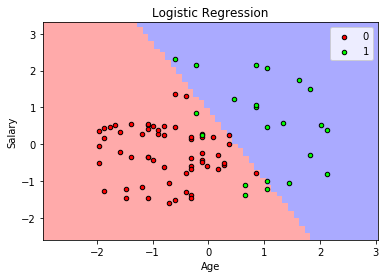

In [20]:
# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)

plt.pcolormesh(X1, X2, Y, cmap=cmap_light)    # 결정경계 표시

# real data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=20, color=cmap_bold(0), label=0, edgecolor='k')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=20, color=cmap_bold(1), label=1, edgecolor='k')

plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

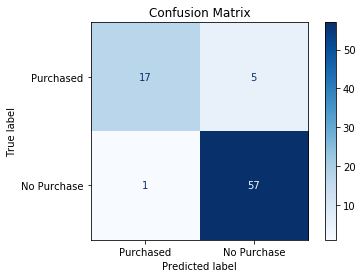

In [21]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr_classifier, X_test, y_test, labels=[1, 0],
                                          display_labels=['Purchased', 'No Purchase'],
                                          cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [28]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [21]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [22]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1
1,33.0,33.0,33.0,1
2,23.0,30.0,30.0,0
3,38.0,35.0,76.0,0
4,7.0,35.0,80.0,0


In [23]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df[['churn']]

### data scaling

In [24]:
# your code here

### Train/Test dataset 분리

In [ ]:
# your code here

In [ ]:
# train the model

In [ ]:
# predict

In [ ]:
# confusion matrix 작성

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))